# Time analysis of PM2.5 data

The present notebook aims to analyze the PM2.5 data from the AgrImOnIA project to determine the time division to execute parallel models. The data is available in the `data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv` file.

The data is recorded by stations throughout Lombardy and it's near regions. The data is recorded every hour and it's available from 2016-01-01 to 2019-12-31.

## Station locations

The following map shows the location of the stations that recorded the PM2.5 data.

![image.png](../docs/images/stations.png)

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Load the data
stations_data = pd.read_csv('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')

# We are only inerested in the IDStations, Time, and AQ_pm25
stations_data = stations_data[['IDStations', 'Time', 'AQ_pm25']]

# Cast PM25 to numeric
stations_data['AQ_pm25'] = pd.to_numeric(stations_data['AQ_pm25'], errors='coerce')

# Cast Time to datetime
stations_data['Time'] = pd.to_datetime(stations_data['Time'])

C:\Users\camil\AppData\Local\Temp\ipykernel_13112\66338916.py:2: DtypeWarning: Columns (0,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  stations_data = pd.read_csv('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')


# PM2.5 in 10 random different stations

In [40]:
# Filter the data by 10 random stations
random_stations = np.random.choice(stations_data['IDStations'], 10)
stations_data_10 = stations_data.loc[stations_data['IDStations'].isin(random_stations)]

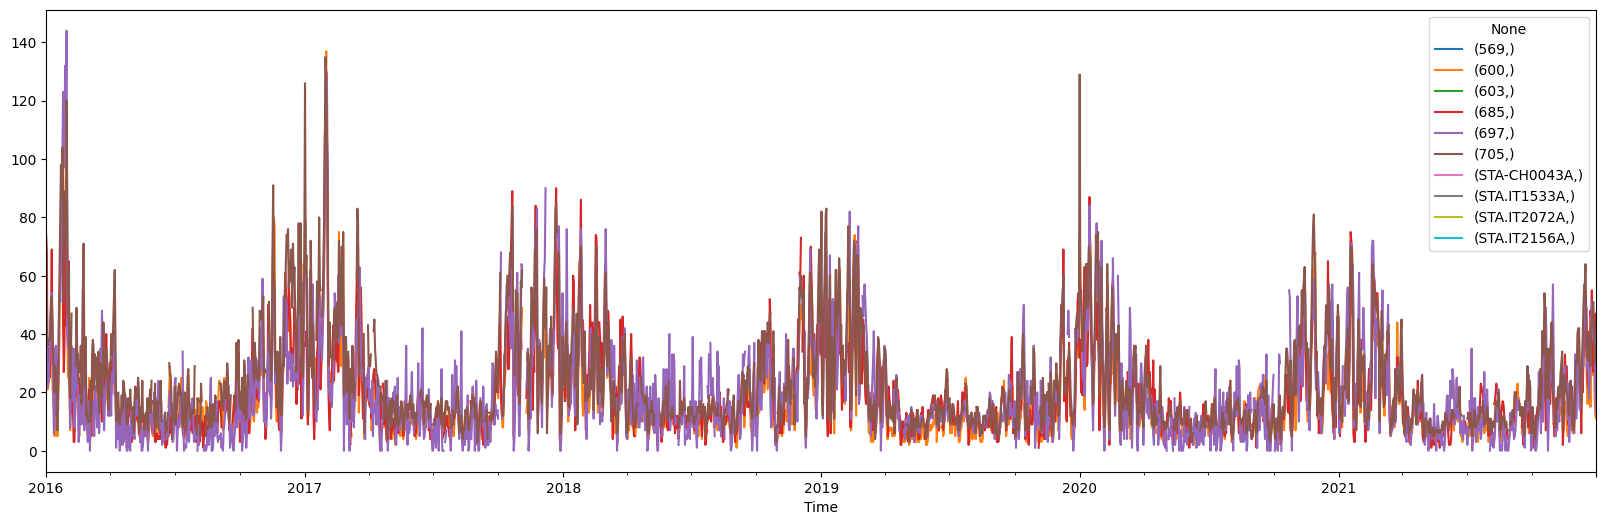

In [41]:
# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))
for key, grp in stations_data_10.groupby(['IDStations']):
    ax = grp.plot(ax=ax, kind='line', x='Time', y='AQ_pm25', label=key)
plt.show()

## Average between all stations

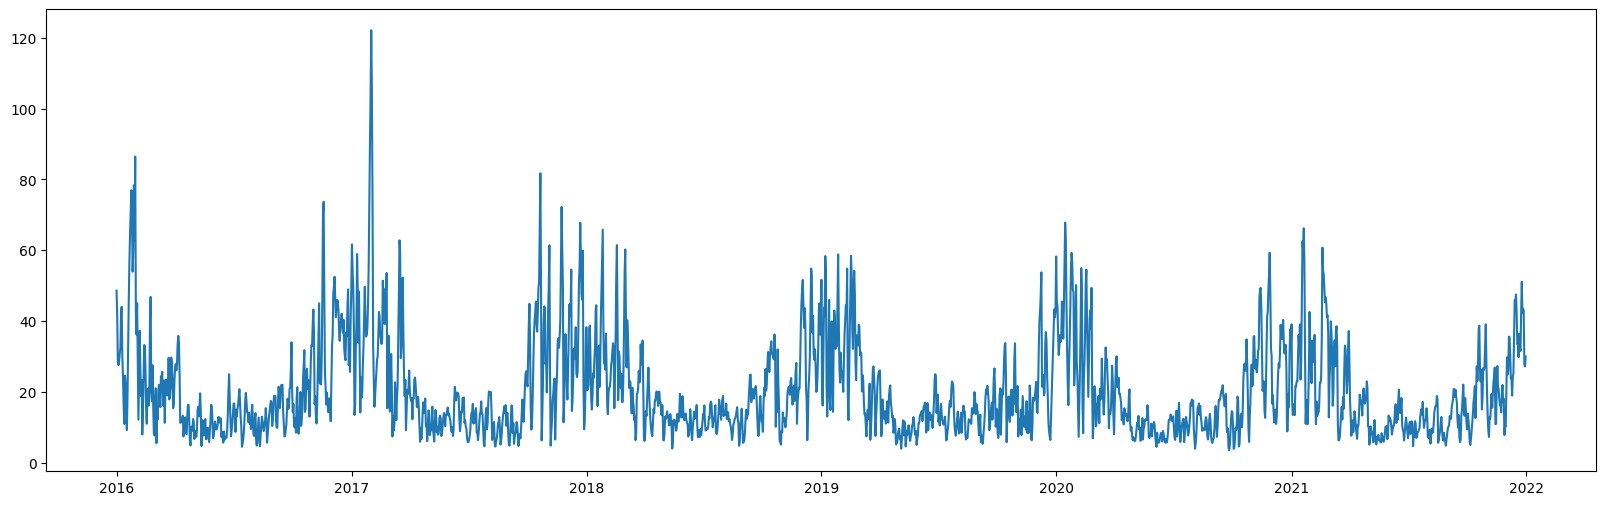

In [42]:
# Drop NaN values
stations_data_avg = stations_data.dropna()

# Drop the IDStations column
stations_data_avg = stations_data_avg.drop(columns=['IDStations'])

# Get the average PM25 of all stations for each day
stations_data_avg = stations_data_avg.groupby(['Time']).mean()

# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(stations_data_avg.index, stations_data_avg['AQ_pm25'])
plt.show()

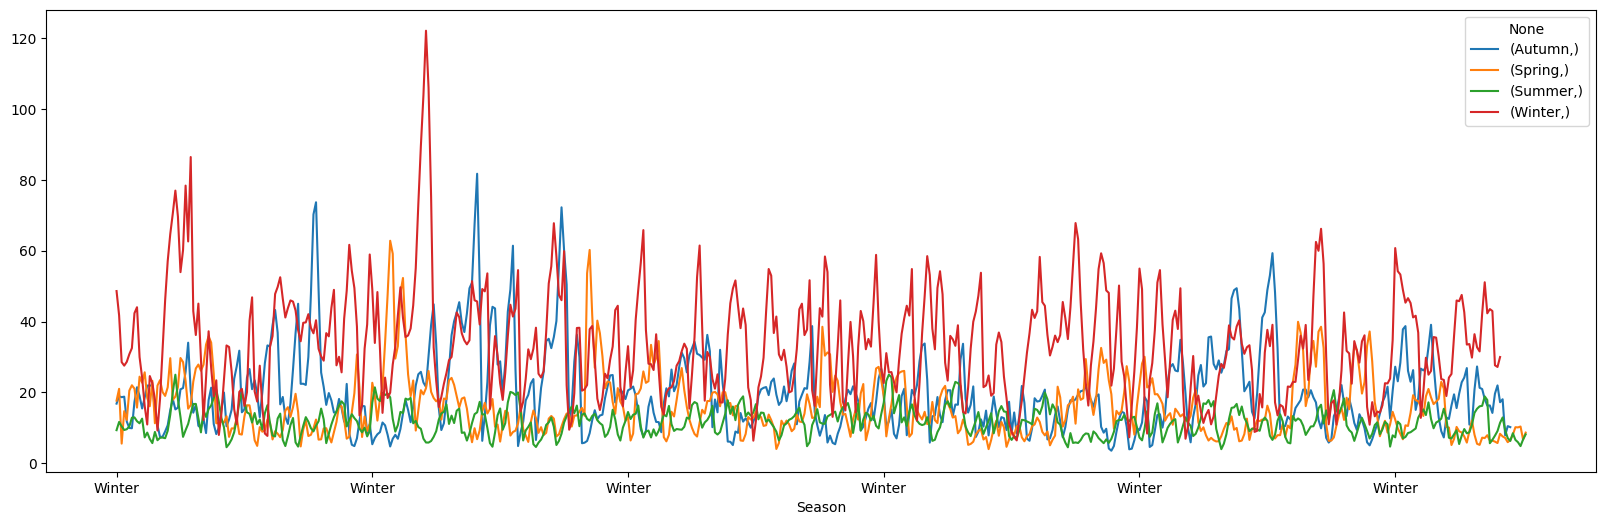

In [44]:
# Let's put in the plot the seasons of the year (Spring, Summer, Autumn, Winter)
# We will use the following dates:
# Spring: March 21 - June 20
# Summer: June 21 - September 20
# Autumn: September 21 - December 20
# Winter: December 21 - March 20

# Add a new column to the dataframe with the season
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
    
stations_data_avg['Season'] = stations_data_avg.index.map(get_season)

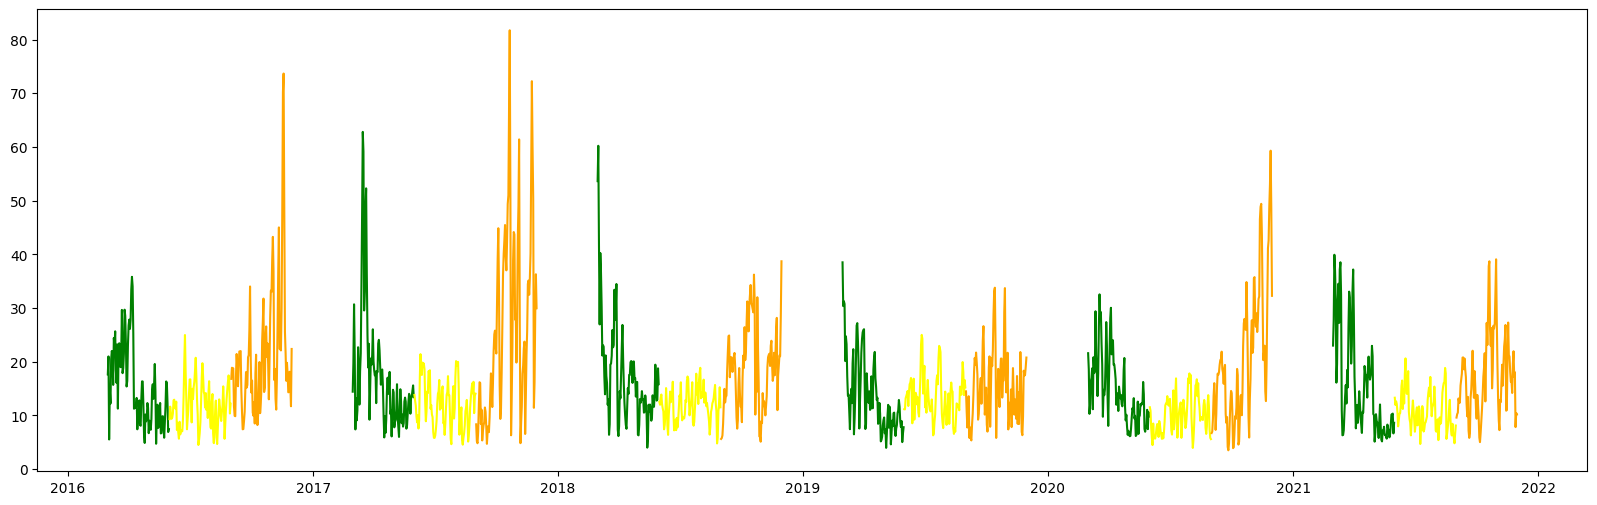

In [51]:
# Plot the data with seaons color
season_colors = {'Spring': 'green', 'Summer': 'yellow', 'Autumn': 'orange', 'Winter': 'blue'}

fig, ax = plt.subplots(figsize=(20, 6))

# Loop through each season and plot the data with the corresponding color
for season, color in season_colors.items():
    data = stations_data_avg[stations_data_avg['Season'] == season]
    if season != 'Winter':
        for year in data.index.year.unique():
            yearly_data = data[data.index.year == year]
            ax.plot(yearly_data.index, yearly_data['AQ_pm25'], color=color)
    else:
        # Handle winter separately since it spans two years
        for year in data.index.year.unique():
            if year != data.index.year.max():
                yearly_data = data[(data.index.year == year) | ((data.index.year == year + 1) & (data.index.month < 3))]
                ax.plot(yearly_data.index, yearly_data['AQ_pm25'], color=color)

plt.show()

In [ ]:
# Ensure 'Time' column is in datetime format and set as index
stations_data_avg.index = pd.to_datetime(stations_data_avg.index)

season_colors = {'Spring': 'green', 'Summer': 'yellow', 'Autumn': 'orange', 'Winter': 'blue'}

fig, ax = plt.subplots(figsize=(20, 6))

# Loop through each season and plot the data with the corresponding color
for season, color in season_colors.items():
    data = stations_data_avg[stations_data_avg['Season'] == season]
    for year in data.index.year.unique():
        yearly_data = data[data.index.year == year]
        # Ensure data is sorted by date before plotting
        yearly_data = yearly_data.sort_index()
        ax.plot(yearly_data.index, yearly_data['AQ_pm25'], color=color)

plt.show()

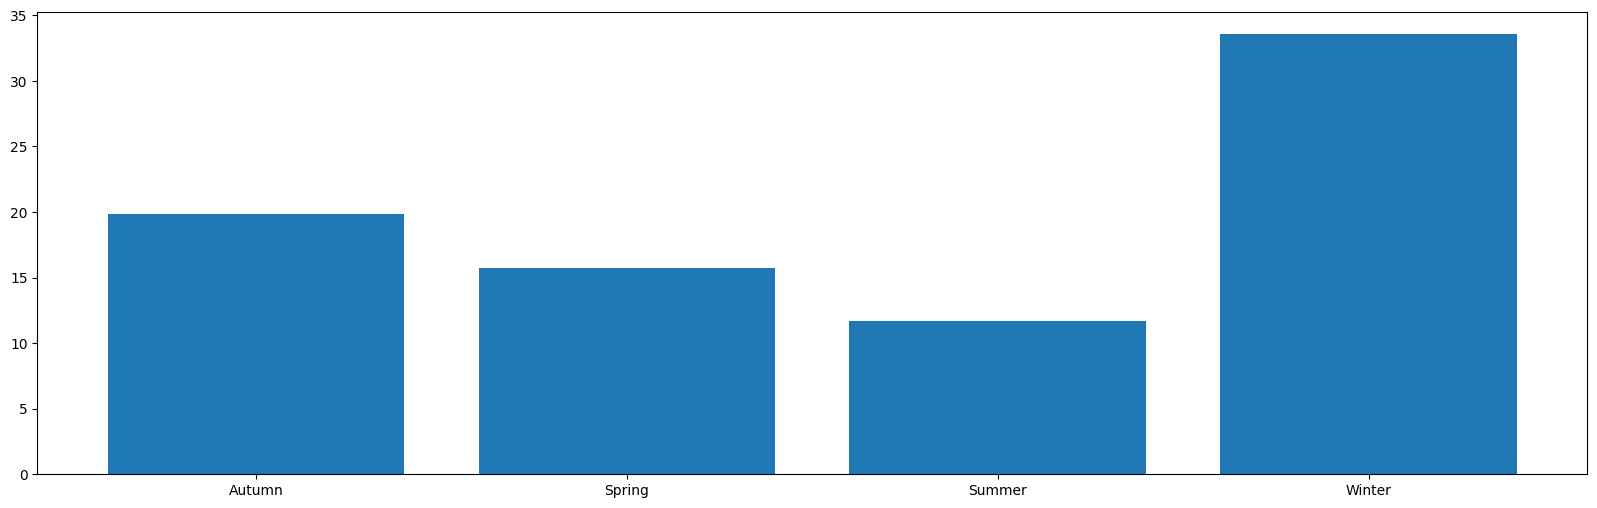

In [45]:
# Average by season
stations_data_avg_season = stations_data_avg.groupby(['Season']).mean()

# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(stations_data_avg_season.index, stations_data_avg_season['AQ_pm25'])
plt.show()